# Analise Exploratoria

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn import ensemble
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn import metrics

In [ ]:
base = pd.read_csv(r'dados/base.csv')
base.head()

,Gender,Age,YearsCodePro,Country,Salary,EdLevel
0,Man,36.0,13,United States,116000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
1,Man,22.0,4,United Kingdom,32315.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
2,Man,23.0,2,United Kingdom,40070.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
3,Man,49.0,7,Spain,14268.0,Some college/university study without earning ...
4,Man,53.0,20,Netherlands,38916.0,"Secondary school (e.g. American high school, G..."


In [28]:
base.shape

(34756, 6)

In [29]:
base.isnull().sum()

Gender          2629
Age             4160
YearsCodePro     135
Country            0
Salary             0
EdLevel          568
dtype: int64

In [30]:
base.dtypes

Gender              str
Age             float64
YearsCodePro        str
Country             str
Salary          float64
EdLevel             str
dtype: object

In [31]:
# tratando formatacao de dados (como sao poucos valores str a serem tratados imputou-se o valor fixo sem muita inferencia)
base['YearsCodePro'] = base['YearsCodePro'].replace({'More than 50 years':'50', 
                                                     'Less than 1 year':'1'}).astype(float)

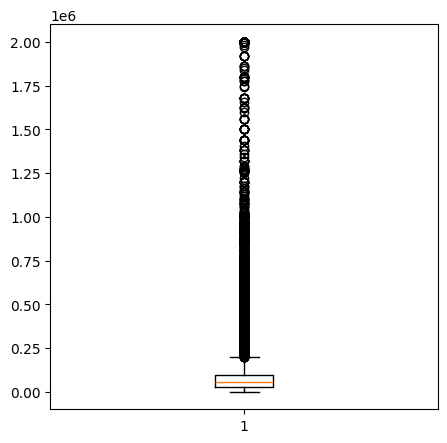

In [32]:
plt.figure(figsize=(5,5))
plt.boxplot(base['Salary'])
plt.show()

In [33]:
base = base[base['Salary']<=250000]


In [34]:
#Country_values = base['Country'].value_counts()
#DevType_values = base['DevType'].value_counts()
#Country_values = base['Country'].value_counts()
Gender_values = base['Gender'].value_counts()
Gender_values

Gender
Man                                                            27910
Woman                                                           2180
Non-binary, genderqueer, or gender non-conforming                228
Man;Non-binary, genderqueer, or gender non-conforming             77
Woman;Non-binary, genderqueer, or gender non-conforming           52
Woman;Man                                                         26
Woman;Man;Non-binary, genderqueer, or gender non-conforming        8
Name: count, dtype: int64

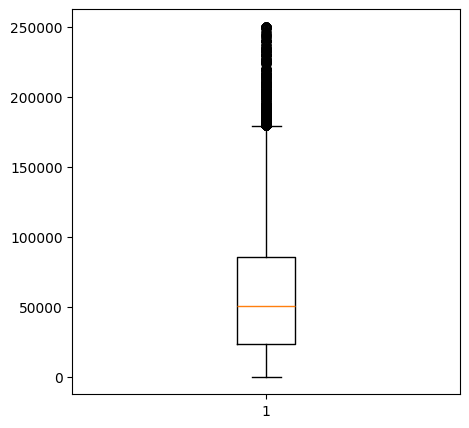

In [35]:
plt.figure(figsize=(5,5))
plt.boxplot(base['Salary'])
plt.show()

In [36]:
# padronizando os dados no formato que o usuario poderar selecionar no site, assim o modelo ja recebera os dados padronizados
edlevel_map = {
    "I never completed any formal education": "No formal education",
    "Primary/elementary school": "Primary/elementary school",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary school (if completed)",
    "Some college/university study without earning a degree": "Some college/university study without earning a degree",
    "Associate degree (A.A., A.S., etc.)": "Associate degree / technical diploma",
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor’s degree",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master’s degree",
    "Professional degree (JD, MD, etc.)": "Professional degree (e.g., JD, MD)",
    "Other doctoral degree (Ph.D., Ed.D., etc.)": "PhD or other doctoral degree"
}

base['EdLevel'] = base['EdLevel'].str.strip().str.replace("’", "'", regex=False)

base['EdLevel'] = base['EdLevel'].replace(edlevel_map)

base['EdLevel'].unique()

<StringArray>
[          'Bachelor's degree (B.A., B.S., B.Eng., etc.)',
        'Master's degree (M.A., M.S., M.Eng., MBA, etc.)',
 'Some college/university study without earning a degree',
                        'Secondary school (if completed)',
                   'Associate degree / technical diploma',
                     'Professional degree (e.g., JD, MD)',
                           'PhD or other doctoral degree',
                                                      nan,
                              'Primary/elementary school',
                                    'No formal education']
Length: 10, dtype: str

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

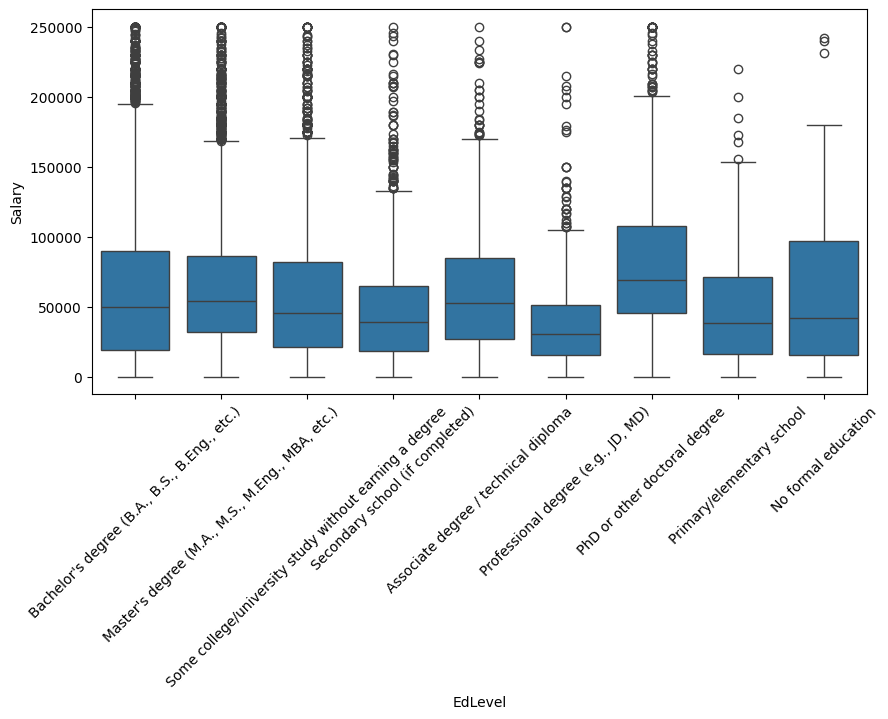

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x='EdLevel', y='Salary', data=base)
plt.xticks(rotation=45)
plt.plot

In [38]:
# padronizando os dados no formato que o usuario poderar selecionar no site, assim o modelo ja recebera os dados padronizados
gender_map = {                                                        'Man':'Man',                                                           
                                                       'Woman':'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming':'Non-binary, genderqueer, or gender non-conforming',
           'Non-binary, genderqueer, or gender non-conforming':'Non-binary, genderqueer, or gender non-conforming',
     'Woman;Non-binary, genderqueer, or gender non-conforming':'Non-binary, genderqueer, or gender non-conforming',
 'Woman;Man;Non-binary, genderqueer, or gender non-conforming':'Non-binary, genderqueer, or gender non-conforming',
                                                   'Woman;Man':'Non-binary, genderqueer, or gender non-conforming'}

base['Gender'] = base['Gender'].replace(gender_map)
base['Gender'].value_counts()


Gender
Man                                                  27910
Woman                                                 2180
Non-binary, genderqueer, or gender non-conforming      391
Name: count, dtype: int64

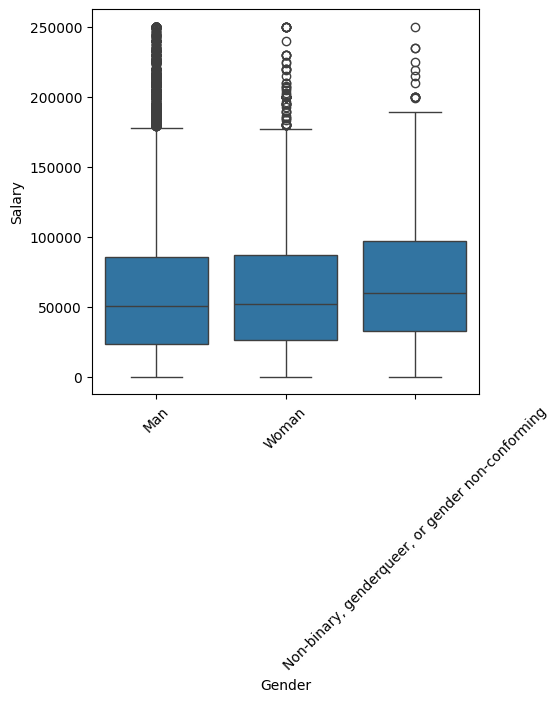

In [39]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Gender', y='Salary', data=base)
plt.xticks(rotation=45)
plt.show()

In [40]:
counts = base['Country'].value_counts()
counts

Country
United States                       7397
India                               2608
United Kingdom                      2292
Germany                             2213
Canada                              1276
                                    ... 
Monaco                                 1
Saint Vincent and the Grenadines       1
Niger                                  1
Belize                                 1
Yemen                                  1
Name: count, Length: 159, dtype: int64

In [41]:
# agrupando categorias raras
base['Country'] = base['Country'].where(
    base['Country'].isin(counts[counts >= 100].index),
    'Other')

base['Country'].value_counts().tail()

Country
Singapore    105
Viet Nam     103
Slovakia     102
Estonia      101
China        100
Name: count, dtype: int64

In [42]:
counts = base['Country'].value_counts()
counts[counts >= 100].index

Index(['United States', 'India', 'United Kingdom', 'Germany', 'Other',
       'Canada', 'Brazil', 'France', 'Netherlands', 'Poland', 'Spain',
       'Australia', 'Italy', 'Russian Federation', 'Sweden', 'Turkey',
       'Switzerland', 'Pakistan', 'Israel', 'Czech Republic', 'Mexico',
       'Romania', 'Ukraine', 'Austria', 'South Africa', 'Iran', 'Belgium',
       'Norway', 'Denmark', 'Ireland', 'Argentina', 'Hungary', 'Portugal',
       'Finland', 'Greece', 'New Zealand', 'Bangladesh', 'Bulgaria', 'Nigeria',
       'Colombia', 'Japan', 'Serbia', 'Indonesia', 'Philippines', 'Lithuania',
       'Croatia', 'Sri Lanka', 'Chile', 'Singapore', 'Viet Nam', 'Slovakia',
       'Estonia', 'China'],
      dtype='str', name='Country')

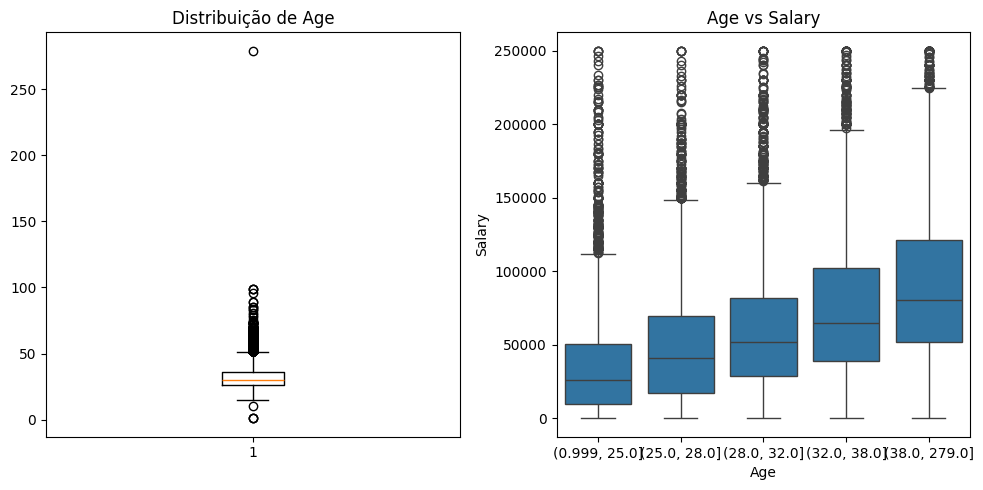

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].boxplot(base['Age'].dropna())
axes[0].set_title('Distribuição de Age')

sns.boxplot(
    x=pd.qcut( # setando bins para vizualizacao eficaz em faixas de idade
    base['Age'],
    q=5,   # 5 faixas
    duplicates='drop'),
    y='Salary',
    data=base,
    ax=axes[1])

axes[1].set_title('Age vs Salary')

plt.tight_layout()
plt.show()

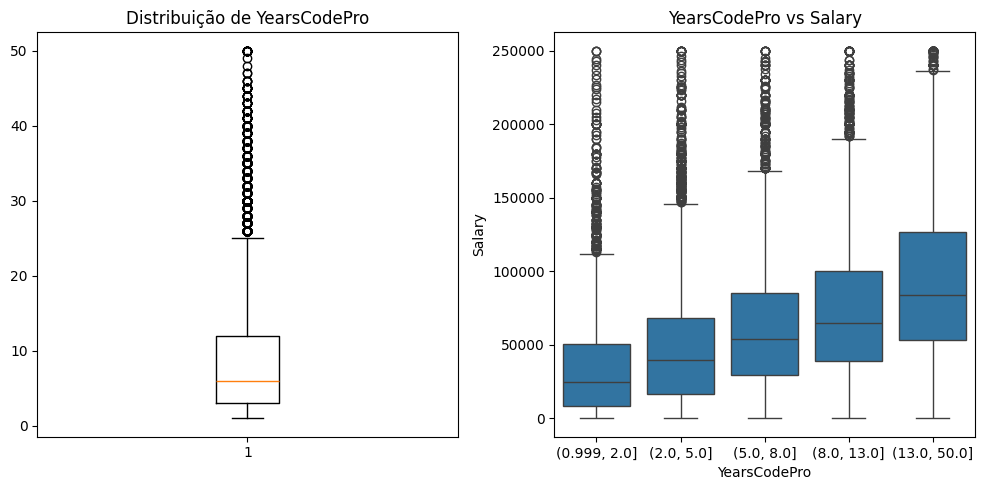

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].boxplot(base['YearsCodePro'].dropna())
axes[0].set_title('Distribuição de YearsCodePro')

sns.boxplot(
    x=pd.qcut( # setando bins para vizualizacao eficaz em faixas de idade
    base['YearsCodePro'],
    q=5,   # 5 faixas
    duplicates='drop'),
    y='Salary',
    data=base,
    ax=axes[1])

axes[1].set_title('YearsCodePro vs Salary')

plt.tight_layout()
plt.show()

In [45]:
base.dtypes

Gender              str
Age             float64
YearsCodePro    float64
Country             str
Salary          float64
EdLevel             str
dtype: object

 # Criaçao de modelo para servir de baseline:

In [62]:
x = base.drop(columns='Salary')
y = base['Salary']   

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x, y, test_size=0.3, random_state=42) 

# para tratar outliers da target pois podem prejudicar o aprendizado do ml()
yeo_t = PowerTransformer(method='yeo-johnson')
ytrain_t = yeo_t.fit_transform(ytrain.to_frame())

# o random forest é mais sensivel a target com outliers, por isso somente target foi tratado
# tratar features pode ser aplicado no futoro pra ver se melhora a precisao 

In [47]:
x_cat = x.dtypes.index[x.dtypes=='str'].tolist()
x_num = x.dtypes.index[x.dtypes=='float64'].tolist()

In [ ]:
pipe_cat = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                           ('mean_encoder', TargetEncoder(smoothing=20))])

pipe_num = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])


transform = ColumnTransformer([('cat_transform', pipe_cat, x_cat), 
                               ('num_transform', pipe_num, x_num)])

modelo = ensemble.RandomForestRegressor(n_estimators=300,
                                        max_depth=15,
                                        min_samples_leaf=5,                                        
                                        random_state=42)

pipe_model = Pipeline(steps=[('transformer', transform), ('model', modelo)])


In [66]:
pipe_model.fit(xtrain, ytrain_t.ravel()) # sklearn.fit é compativel com array

ytrain_predict = yeo_t.inverse_transform(pipe_model.predict(xtrain).reshape(-1, 1)).ravel() # reshape: inverse_tresnforme é compativel com frame(n, n), 
ytest_predict = yeo_t.inverse_transform(pipe_model.predict(xtest).reshape(-1, 1)).ravel()   # ravel: o ideal pra metrics.rmse é array (n,) 

baseline_report = {
'rmse_train': metrics.root_mean_squared_error(ytrain, ytrain_predict),
'rmse_test': metrics.root_mean_squared_error(ytest, ytest_predict),
'nrmse': metrics.root_mean_squared_error(ytest, ytest_predict)/np.mean(ytest),
'r2': metrics.r2_score(ytest, ytest_predict)
}

c:\dtf\CSs\DS_Academy\projetos\aplicacao_web_integracao_c_ml_-disc_1_eng_ml\appwebml\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
c:\dtf\CSs\DS_Academy\projetos\aplicacao_web_integracao_c_ml_-disc_1_eng_ml\appwebml\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [67]:
baseline_report

{'rmse_train': 28998.056924478497,
 'rmse_test': 31080.078384372995,
 'nrmse': np.float64(0.5041065659017896),
 'r2': 0.6002983843777427}